## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [ ]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [37]:
#pt. 1

file_name = "~/data/data_000637.txt"

Max_index = 1310720
N = input("Insert N number of rows to read from the file: ")
N = int(N)

while N < 10000 or N > Max_index:
    if N < 10000:
        print("N too small. N should be greater than 10000 and smaller or equal than", Max_index)
        N = input("Insert N number of rows to read from the file: ")
        N = int(N)
    elif N > Max_index:
        print("N too big. Your N should be greater than 10000 and smaller or equal than", Max_index)
        N = input("Insert N number of rows to read from the file: ")
        N = int(N)

data = pd.read_csv(file_name, nrows=N)
data

Insert N number of rows to read from the file: 7
N too small. N should be greater than 10000 and smaller or equal than 1310720
Insert N number of rows to read from the file: 1310720


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


In [15]:
#pt. 2

M = data['BX_COUNTER'].max()

print(data[data['BX_COUNTER'] == M].head())
print("\nNote that the values of TDC_MEAS corresponding to the maxima values of BX_COUNTER are not zero. So we can suppose that the value of BX_COUNTER for which ORBIT_CNT is increased by one unit (x) is equal to M+1")

x = M+1
print("\nx =", x)

      HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
2893     1     0           45  3869200195        3563        29
4073     1     0          122  3869200207        3563        22
4461     1     0          124  3869200211        3563         6
4745     1     1           27  3869200214        3563         3
4747     1     1           28  3869200214        3563        10

Note that the values of TDC_MEAS corresponding to the maxima values of BX_COUNTER are not zero. So we can suppose that the value of BX_COUNTER for which ORBIT_CNT is increased by one unit (x) is equal to M+1

x = 3564


In [16]:
#pt. 3

#print(data.loc[0, ['ORBIT_CNT', 'BX_COUNTER', 'TDC_MEAS']])
#print('\n')
#print(data.loc[N-1, ['ORBIT_CNT', 'BX_COUNTER', 'TDC_MEAS']])

t_f = (data.loc[N-1, 'TDC_MEAS']*(25/30)*10**(-9)) + (data.loc[N-1, 'BX_COUNTER']*25*10**(-9)) + (data.loc[N-1, 'ORBIT_CNT']*x*25*10**(-9))
t_i = (data.loc[0, 'TDC_MEAS']*(25/30)*10**(-9)) + (data.loc[0, 'BX_COUNTER']*25*10**(-9)) + (data.loc[0, 'ORBIT_CNT']*x*25*10**(-9))
D_t = t_f - t_i
print("The data taking lasted:", D_t, "seconds")

The data taking lasted: 0.9804160933708772 seconds


In [17]:
#pt. 4

data['ABS_TIME'] = (data['TDC_MEAS']*25/30) + (data['BX_COUNTER']*25) + (data['ORBIT_CNT']*x*25)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.447467e+14
1310716,1,1,4,3869211171,763,11,3.447467e+14
1310717,1,0,64,3869211171,764,0,3.447467e+14
1310718,1,0,139,3869211171,769,0,3.447467e+14


In [18]:
#pt. 5

data['HEAD'] = np.random.randint(0, 2, size=N)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,0,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.447467e+14
1310716,1,1,4,3869211171,763,11,3.447467e+14
1310717,1,0,64,3869211171,764,0,3.447467e+14
1310718,0,0,139,3869211171,769,0,3.447467e+14


In [19]:
#pt. 6

df = data[data['HEAD'] == 1].copy()
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
7,1,0,139,3869200167,2776,0,3.447457e+14
...,...,...,...,...,...,...,...
1310712,1,1,35,3869211171,429,4,3.447467e+14
1310714,1,0,60,3869211171,762,2,3.447467e+14
1310715,1,0,62,3869211171,762,14,3.447467e+14
1310716,1,1,4,3869211171,763,11,3.447467e+14


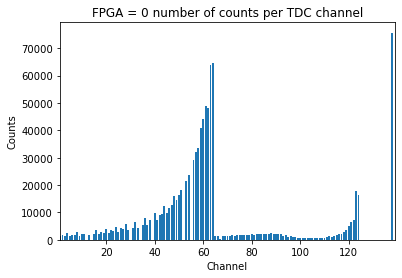

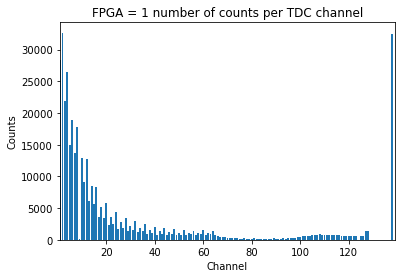

In [20]:
#pt. 7

FPGA_0 = data[data['FPGA'] == 0].copy()
FPGA_1 = data[data['FPGA'] == 1].copy()

m_0 = FPGA_0['TDC_CHANNEL'].min()
M_0 = FPGA_0['TDC_CHANNEL'].max()
#print(m0, M0)

m_1 = FPGA_0['TDC_CHANNEL'].min()
M_1 = FPGA_0['TDC_CHANNEL'].max()
#print(m1, M1)

hist_0, bin_edges_0 = np.histogram(np.sort(FPGA_0['TDC_CHANNEL']), bins = range(m_0, M_0 + 1))
#print(hist_0)
#print(bin_edges_0)
plt.bar(bin_edges_0[:-1], hist_0, width = 0.8)
plt.xlim(min(bin_edges_0), max(bin_edges_0))
plt.title('FPGA = 0 number of counts per TDC channel')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.show()   
    
hist_1, bin_edges_1 = np.histogram(np.sort(FPGA_1['TDC_CHANNEL']), bins = range(m_1, M_1 + 1))
#print(hist_1)
#print(bin_edges_1)
plt.bar(bin_edges_1[:-1], hist_1, width = 0.8)
plt.xlim(min(bin_edges_1), max(bin_edges_1))
plt.title('FPGA = 1 number of counts per TDC channel')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.show()   

In [21]:
#pt. 8a

FPGA_0['CNT'] = np.ones(len(FPGA_0))
df_0 = FPGA_0.groupby(['TDC_CHANNEL']).sum()
df_0 = df_0.sort_values(by=['CNT'], ascending=False)
#df_0
print("Top three noisy channels for FPGA = 0 are:\n")
print(df_0.iloc[0], '\n\n', df_0.iloc[1], '\n\n', df_0.iloc[2])

Top three noisy channels for FPGA = 0 are:

HEAD          3.799000e+04
FPGA          0.000000e+00
ORBIT_CNT     2.925778e+14
BX_COUNTER    1.344825e+08
TDC_MEAS      0.000000e+00
ABS_TIME      2.606868e+19
CNT           7.561700e+04
Name: 139, dtype: float64 

 HEAD          3.265500e+04
FPGA          0.000000e+00
ORBIT_CNT     2.498772e+14
BX_COUNTER    1.151803e+08
TDC_MEAS      9.410850e+05
ABS_TIME      2.226406e+19
CNT           6.458100e+04
Name: 64, dtype: float64 

 HEAD          3.182400e+04
FPGA          0.000000e+00
ORBIT_CNT     2.465613e+14
BX_COUNTER    1.138282e+08
TDC_MEAS      9.246890e+05
ABS_TIME      2.196861e+19
CNT           6.372400e+04
Name: 63, dtype: float64


In [22]:
#pt. 8b

FPGA_1['CNT'] = np.ones(len(FPGA_1))
df_1 = FPGA_1.groupby(['TDC_CHANNEL']).sum()
df_1 = df_1.sort_values(by=['CNT'], ascending=False)
#df_1
print("Top three noisy channels for FPGA = 1 are:\n")
print(df_1.iloc[0], '\n\n', df_1.iloc[1], '\n\n', df_1.iloc[2])

Top three noisy channels for FPGA = 1 are:

HEAD          1.642400e+04
FPGA          3.266900e+04
ORBIT_CNT     1.264031e+14
BX_COUNTER    5.819422e+07
TDC_MEAS      4.752210e+05
ABS_TIME      1.126252e+19
CNT           3.266900e+04
Name: 2, dtype: float64 

 HEAD          1.615200e+04
FPGA          3.244200e+04
ORBIT_CNT     1.255248e+14
BX_COUNTER    5.799516e+07
TDC_MEAS      0.000000e+00
ABS_TIME      1.118426e+19
CNT           3.244200e+04
Name: 139, dtype: float64 

 HEAD          1.432800e+04
FPGA          2.843800e+04
ORBIT_CNT     1.100325e+14
BX_COUNTER    5.085486e+07
TDC_MEAS      4.133280e+05
ABS_TIME      9.803895e+18
CNT           2.843800e+04
Name: 1, dtype: float64


In [38]:
#pt. 9

cnt = 0
count = 0
for val in data['ORBIT_CNT'].drop_duplicates():
    temp = data[data['ORBIT_CNT'] == val]
    if len(temp) == 1:
        cnt += 1
        #if temp['TDC_CHANNEL'].item(139) >= 1:
        if np.any(temp['TDC_CHANNEL'] == 139) == True:
            count += 1

print("The number of unique orbits is:", cnt, "\n")
print("The number of unique orbits with at least one measurement from TDC_CHANNEL=139 is: ", count)

The number of unique orbits is: 2 

The number of unique orbits with at least one measurement from TDC_CHANNEL=139 is:  0
